<a href="https://colab.research.google.com/github/gabmac/ISL/blob/main/Chapter3_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Chapter 3*

Exercise from Chapter 3 of ***An introduction to Statistical Learning***  by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.

# Lab

## 3.6.2 Single Linear Regression

In [ ]:
#%clear
#%reset
from sklearn.datasets import load_boston
from sklearn import linear_model
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

np.random.seed(31415) 

#?load_boston

In [ ]:
boston_data = load_boston()

dfBoston = pd.DataFrame(boston_data['data'],columns=boston_data.feature_names)

#MEDV = median value
dfBoston['MEDV']= boston_data.target

In [ ]:
dfBoston.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   7.88  11.

In [ ]:
dfBoston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
dfBoston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
linreg_model = linear_model.LinearRegression()

x = dfBoston[['LSTAT']] #percent of households with low socioeconomic status
y = dfBoston[['MEDV']]

model1 = linreg_model.fit(x,y)

print('coefficient is {}'.format(model1.coef_[0][0]))
print('intercept is {}'.format(model1.intercept_[0]))

coefficient is -0.9500493537579906
intercept is 34.5538408793831


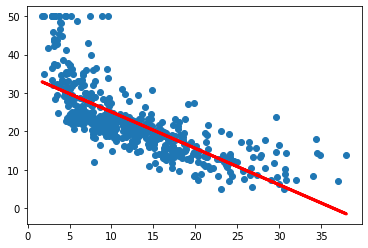

In [ ]:
new_y1 = model1.predict(x)
plt.scatter(x,y)
plt.plot(x, new_y1, color ='red', linewidth = 3)
plt.xticks()
plt.yticks()
plt.show()

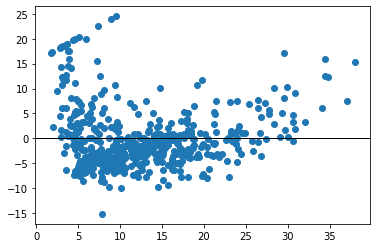

In [ ]:
e1 = y - new_y1
plt.scatter(x,e1)
plt.axhline(y=0,linewidth=1, color='k')
plt.xticks()
plt.yticks()
plt.show()

In [ ]:
MSE_1 = mean_squared_error(y,new_y1)
R2_1 = r2_score(y,new_y1)

In [ ]:
print(f'MSE of model 1: {MSE_1}')
print(f'R2 of model 1: {R2_1}')

MSE of model 1: 38.48296722989415
R2 of model 1: 0.5441462975864797


## 3.6.3 Multiple Linear Regression

In [ ]:
x = dfBoston[['LSTAT','AGE']] #percent of households with low socioeconomic status
y = dfBoston[['MEDV']]

model2 = linreg_model.fit(x,y)

print('coefficient is {}'.format(model2.coef_))
print('intercept is {}'.format(model2.intercept_[0]))


coefficient is [[-1.03206856  0.03454434]]
intercept is 33.2227605317929


In [ ]:
new_y2 = model2.predict(x)


MSE_2 = mean_squared_error(y,new_y2)
R2_2 = r2_score(y,new_y2)

print(f'MSE of model 1: {MSE_2}')
print(f'R2 of model 1: {R2_2}')

MSE of model 1: 37.88167709241267
R2 of model 1: 0.5512689379421003


In [ ]:
x = dfBoston.iloc[:,:13] #percent of households with low socioeconomic status
y = dfBoston[['MEDV']]

model3 = linreg_model.fit(x,y)

print('coefficient is {}'.format(model3.coef_))
print('intercept is {}'.format(model3.intercept_))


coefficient is [[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
  -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
   3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
  -5.24758378e-01]]
intercept is [36.45948839]


In [ ]:
new_y3 = model3.predict(x)


MSE_3 = mean_squared_error(y,new_y3)
R2_3 = r2_score(y,new_y3)

print(f'MSE of model 1: {MSE_3}')
print(f'R2 of model 1: {R2_3}')

MSE of model 1: 21.894831181729202
R2 of model 1: 0.7406426641094095
